In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
path = r'/Users/vanessanunezpenas/Documents/Data Analytics Program - CareerFoundry/II Data Immersion 1 - Preparing and Analyzing Data/A4 - Python Fundamentals/2024.01 Instacart Basket Analysis'
path

'/Users/vanessanunezpenas/Documents/Data Analytics Program - CareerFoundry/II Data Immersion 1 - Preparing and Analyzing Data/A4 - Python Fundamentals/2024.01 Instacart Basket Analysis'

In [3]:
orders_products_all = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'final_orders_products_all.pkl'))

## Simpler Price Range

In [6]:
orders_products_all.loc[orders_products_all['prices'] > 15, 'price_range_loc'] = 'High-range product'

In [8]:
orders_products_all.loc[(orders_products_all['prices'] <= 15) & (orders_products_all['prices'] > 5), 'price_range_loc'] = 'Mid-range product'

In [9]:
orders_products_all.loc[orders_products_all['prices'] <= 5, 'price_range_loc'] = 'Low-range product'

Text(0.5, 0, 'Range of Prices')

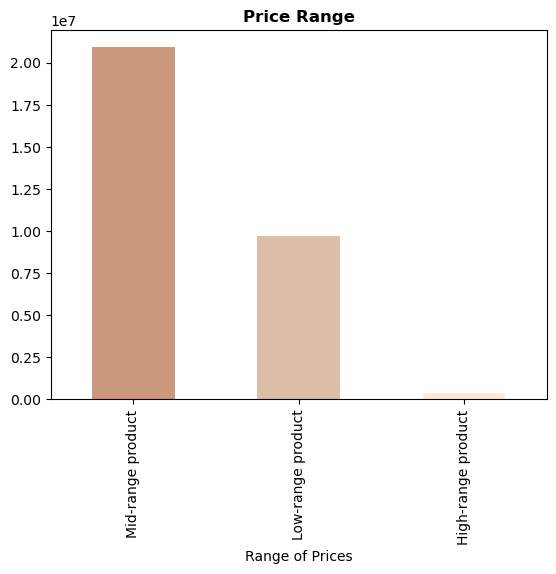

In [10]:
bars_price_range = orders_products_all['price_range_loc'].value_counts().plot.bar(color = ['#cb997e', '#ddbea9', '#ffe8d6'])
plt.title('Price Range', fontweight = 'bold')
plt.xlabel("Range of Prices")

## Ordering habits based on a customer’s loyalty status

In [12]:
# Crossing the the variables 'loyalty' and 'price_range_loc'

loyalty_expenditure_distribution = orders_products_all[['loyalty_flag', 'price_range_loc']].value_counts()

In [13]:
# Converting the Series into a DataFrame for further analyses

loyalty_expenditure_distribution_df = loyalty_expenditure_distribution.reset_index(name='count')

Text(0, 0.5, 'Count')

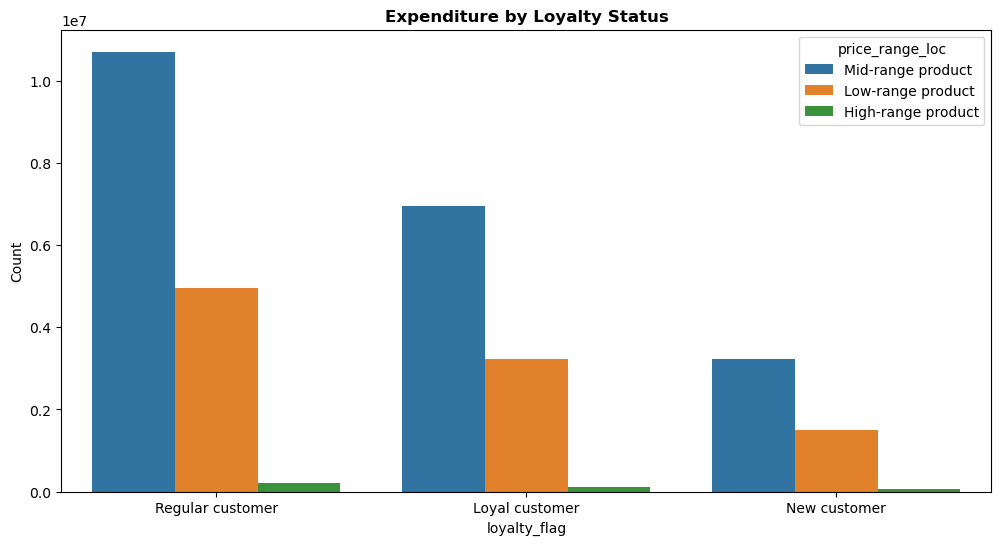

In [15]:
# Expenditure by Loyalty Status

plt.figure(figsize=(12, 6))
bar_loyalty_expenditure_distribution = sns.barplot(data = loyalty_expenditure_distribution_df, x='loyalty_flag', y='count', hue='price_range_loc')
plt.title('Expenditure by Loyalty Status', fontweight='bold')
plt.xlabel('loyalty_flag')
plt.ylabel('Count')

In [16]:
orders_products_all['frequency_flag']

0           Non-frequent customer
1           Non-frequent customer
2           Non-frequent customer
3           Non-frequent customer
4           Non-frequent customer
                    ...          
32406032        Frequent customer
32406033        Frequent customer
32406034        Frequent customer
32406035        Frequent customer
32406036        Frequent customer
Name: frequency_flag, Length: 30965686, dtype: object

In [20]:
# Crossing the the variables 'loyalty' and 'busiest_days'

loyalty_days_orders = orders_products_all[['loyalty_flag', 'busiest_days']].value_counts()

In [21]:
# Converting the Series into a DataFrame for further analyses

loyalty_days_orders_df = loyalty_days_orders.reset_index(name='count')

Text(0, 0.5, 'Count')

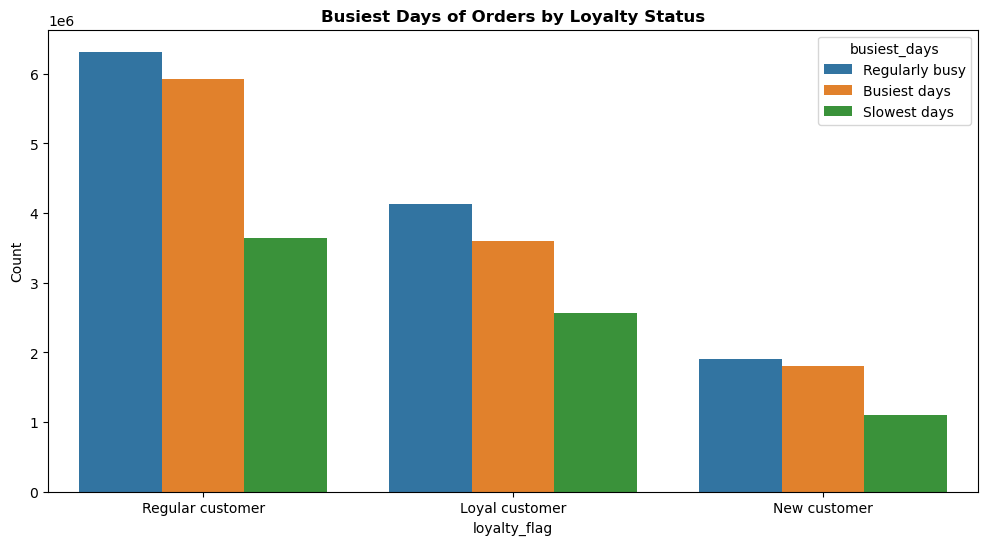

In [22]:
# Busiest Days of Orders by Loyalty Status

plt.figure(figsize=(12, 6))
bar_loyalty_days_orders = sns.barplot(data = loyalty_days_orders_df, x='loyalty_flag', y='count', hue='busiest_days')
plt.title('Busiest Days of Orders by Loyalty Status', fontweight='bold')
plt.xlabel('loyalty_flag')
plt.ylabel('Count')

## Connection between age and family status in terms of ordering habits

In [23]:
# Crossing the the variables 'region' and 'department'

profile_department_distribution = orders_products_all[['age_range', 'department']].value_counts()

In [24]:
# Series into a DataFrame for further analyses

profile_department_distribution_df = profile_department_distribution.reset_index(name='count')

In [25]:
# Sort the values first

profile_department_distribution_df_sorted = profile_department_distribution_df.sort_values(by=['age_range', 'count'], ascending=[True, False])

In [26]:
# Group by 'region' and get the top 3 for each region

top_profile_department_distribution = profile_department_distribution_df_sorted.groupby('age_range').head(3).reset_index(drop=True)

Text(0, 0.5, 'Count')

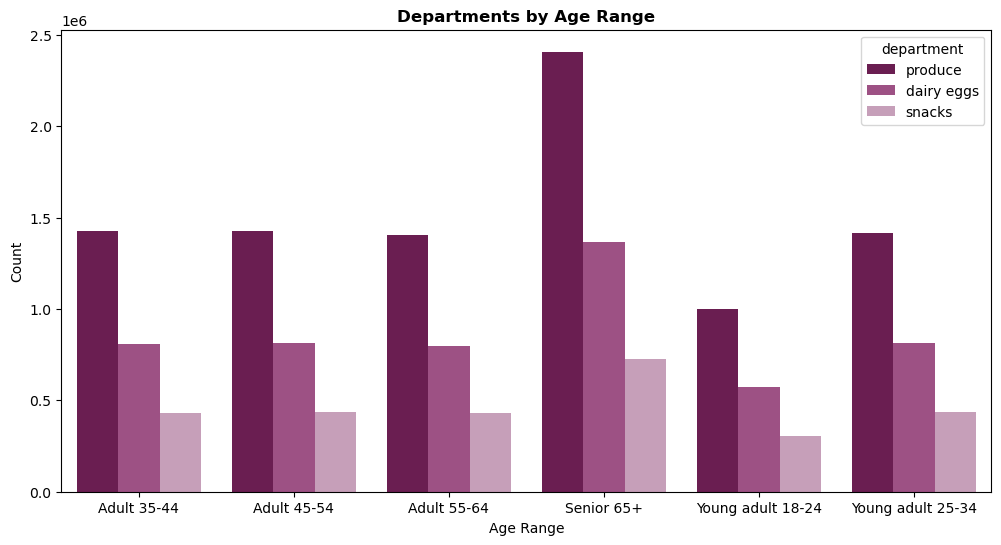

In [28]:
# Departments by Age Range

plt.figure(figsize=(12, 6))
bar_customer_department_distribution = sns.barplot(data = top_profile_department_distribution, x='age_range', y='count', hue='department', palette=["#771155", "#AA4488", "#CC99BB"])
plt.title('Departments by Age Range', fontweight='bold')
plt.xlabel('Age Range')
plt.ylabel('Count')